In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import re
import random

In [4]:
#change file name
path = "puzzle.sav"
def load_puzzle(path):
    file = open(path, "r")
    desc = []
    numered_block = {}
    for line in file:
        print(line)
        text = line.strip().split(":")
        if text[0].strip() == "DESC":
            desc = re.findall('.', text[2].strip())
    print(desc)
    grid = np.zeros((7, 7), dtype=int)
    i = 0
    run = 0
    for x in range(7):
        for y in range(7):
            c = '\0'

            if run == 0:
                c = desc[i]
                i = i + 1
                if c >= 'a' and c <= 'z':
                    run = ord(c) - ord('a') + 1

            if run > 0:
                c = 'S'
                run = run - 1

            if c == '0' or c == '1' or c == '2' or c == '3' or c == '4':
                grid[x, y] = ord(c) - ord('0')
                numered_block[(x, y)] = grid[x, y]
            elif c == 'B':
                grid[x, y] = -1
            elif c == 'S':
                grid[x, y] = -2
    return grid, numered_block


            
# -2: espaco vazio, -1: parede, 0 a 4: n de lampadas que podem iluminar, 5: lampada, 6: blocos iluminados  
grid, num_blocks = load_puzzle(path)
print(grid)
print(num_blocks)

SAVEFILE:41:Simon Tatham's Portable Puzzle Collection

VERSION :1:1

GAME    :8:Light Up

PARAMS  :10:7x7b20s4d0

CPARAMS :10:7x7b20s4d0

SEED    :15:304364861695276

DESC    :17:i0a2cBcBiBc3cBa4i

NSTATES :1:1

STATEPOS:1:1

['i', '0', 'a', '2', 'c', 'B', 'c', 'B', 'i', 'B', 'c', '3', 'c', 'B', 'a', '4', 'i']
[[-2 -2 -2 -2 -2 -2 -2]
 [-2 -2  0 -2  2 -2 -2]
 [-2 -1 -2 -2 -2 -1 -2]
 [-2 -2 -2 -2 -2 -2 -2]
 [-2 -1 -2 -2 -2  3 -2]
 [-2 -2 -1 -2  4 -2 -2]
 [-2 -2 -2 -2 -2 -2 -2]]
{(1, 2): 0, (1, 4): 2, (4, 5): 3, (5, 4): 4}


[[-2 -2 -2 -2 -2 -2 -2]
 [-2 -2  0 -2  2 -2 -2]
 [-2 -1 -2 -2 -2 -1 -2]
 [-2 -2 -2 -2 -2 -2 -2]
 [-2 -1 -2 -2 -2  3 -2]
 [-2 -2 -1 -2  4 -2 -2]
 [-2 -2 -2 -2 -2 -2 -2]]
{(1, 2): 0, (1, 4): 2, (4, 5): 3, (5, 4): 4}
dict_values([0, 2, 3, 4])


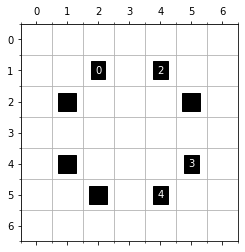

[[ 6  5  6  6  6  6  6]
 [ 6  6  0  6  2  5  6]
 [ 5 -1  6  6  6 -1  6]
 [ 6  6  5  6  6  6  6]
 [ 6 -1  6  6  5  3  5]
 [ 6  5 -1  5  4  5  6]
 [ 6  6  6  6  5  6  6]]


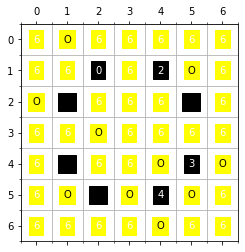

{(1, 2): 0, (1, 4): 1, (4, 5): 0, (5, 4): 0}
22


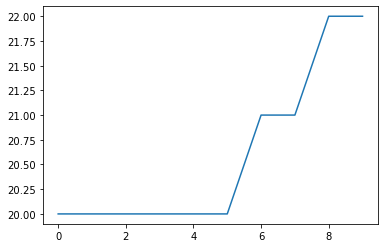

In [25]:
def is_valid_position(grid_map, num_block, i, j):
    row = grid_map[:, j]
    col = grid_map[i, :]
    valid = True
    if grid_map[i, j] in range(-1, 6):
        return False
    
    p1 = num_block.get((i+1, j))
    p2 = num_block.get((i-1, j))
    p3 = num_block.get((i, j+1))
    p4 = num_block.get((i, j-1))
    if (p1 is not None) and (p1 == 0):
        return False
    if (p2 is not None) and (p2 == 0):
        return False
    if (p3 is not None) and (p3 == 0):
        return False
    if (p4 is not None) and (p4 == 0):
        return False
    
    for r in range(i+1, 7):
        if row[r] == 5:
            valid = False
        elif row[r] in range(-1, 7):
            break
    for r in range(i-1, -1, -1):
        if row[r] == 5:
            valid = False
        elif row[r] in range(-1, 7):
            break
    for c in range(j+1, 7):
        if col[c] == 5:
            valid = False
        elif col[c] in range(-1, 7):
            break
    for c in range(j-1, -1, -1):
        if col[c] == 5:
            valid = False
        elif col[c] in range(-1, 7):
            break
    return valid
    
def calc_light_cells(grid_sol):
    grids = np.array(grid_sol)
    for i in range(7):
        for j in range(7):
            v = grids[i, j]
            if v == 5:
                for r in range(i, 7):
                    if grids[r, j] == -2:
                        grids[r, j] = 6
                    elif grids[r, j] in range(-1, 5):
                        break
                for r in range(i, -1, -1):
                    if grids[r, j] == -2:
                        grids[r, j] = 6
                    elif grids[r, j] in range(-1, 5):
                        break
                for c in range(j, 7):
                    if grids[i, c] == -2:
                        grids[i, c] = 6
                    elif grids[i, c] in range(-1, 5):
                        break
                for c in range(j, -1, -1):
                    if grids[j, c] == -2:
                        grids[j, c] = 6
                    elif grids[j, c] in range(-1, 5):
                        break
    return grids
# -2: espaco vazio, -1: parede, 0 a 4: n de lampadas que podem iluminar, 5: lampada, 6: blocos iluminados                    
def print_map(data, is_solution):
    fig, ax = plt.subplots()
    cmap = colors.ListedColormap(['white'] * 7)
   
            
    ax.matshow(data, cmap = cmap)
    for (i, j), z in np.ndenumerate(data):
        c = 'black'
        bg = 'white'
        if z in range(-1, 5):
            bg = 'black'
        elif z == 5 or z == 6:
            bg = 'yellow'
        if z > -1:
            c = 'white'
        if z == 5:
            c = 'black'
        if z == 5:
            ax.text(j, i, 'O', color = c,ha='center', va='center', backgroundcolor = bg)
        elif z != -2:
            ax.text(j, i, z, color = c,ha='center', va='center', backgroundcolor = bg)
        else:
            ax.text(j, i, ' ', color = c,ha='center', va='center', backgroundcolor = bg)
        
    plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
    plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
    #ax.invert_yaxis()
    plt.grid(which='minor')
    plt.show()
    
def put_position(gr, nb, i, j):
    if is_valid_position(gr,nb, i, j) == True:
        gr[i, j] = 5
        # Atualiza numero de luzes que faltam iluminar os blocos
        p1 = nb.get((i+1, j))
        p2 = nb.get((i-1, j))
        p3 = nb.get((i, j+1))
        p4 = nb.get((i, j-1))
        if p1 is not None:
            nb[(i+1, j)] = p1 - 1
        if p2 is not None:
            nb[(i-1, j)] = p2 - 1
        if p3 is not None:
            nb[(i, j+1)] = p3 - 1
        if p4 is not None:
            nb[(i, j-1)] = p4 - 1

def generate_random_state(grid_map, num_block, num_lights):
    nb = num_block.copy()
    gr = np.array(grid_map)
    xs = random.sample(range(7), 7)
    ys = random.sample(range(7), 7)
    lights = num_lights - 7
    if False:
        while lights > 7:
            xs = xs + random.sample(range(7), 7)
            ys = xs + random.sample(range(7), 7)
            lights = lights - 7

        if lights > 0:
            xs = xs + random.sample(range(7), lights)
            ys = ys + random.sample(range(7), lights)
    
    xs = list(range(7)) * (num_lights // 7)
    ys = list(range(7)) * (num_lights // 7)
    random.shuffle(xs)
    random.shuffle(ys)
        
  
    for i in xs:
        for j in ys:
            put_position(gr, nb, i, j)
    return gr, nb
    
def calc_num_spaces(grid_map):
    spaces = (grid_map == -2).sum()
    return spaces

def calc_num_yellow(grid_map):
    lighted = (grid_map == 6).sum()
    return lighted

def calc_value(grid_map, num_blocks):
    num_spaces = calc_num_spaces(grid_map)
    num_blocks_no_light = sum(list(num_blocks.values()))
    return num_spaces + num_blocks_no_light

def calc_value2(grid_map, num_blocs):
    num_yellows = calc_num_yellow(grid_map)
    num_blocks_no_light = sum(list(num_blocks.values()))
    return num_yellows - num_blocks_no_light
    
def calc_next_state(grid_map, num_block, num_lights):
    nb = num_block.copy()
    gr = np.array(grid_map)
    nb_item_list = np.array(list(nb.values()))
    idxs = np.argsort(nb_item_list)[::-1]
    ks = list(nb.keys())
    nbb = nb.copy()
    for idx in idxs:
        v = ks[idx]
        pos = []
        pos.append((v[0]+1, v[1]))
        pos.append((v[0]-1, v[1]))
        pos.append((v[0], v[1]+1))
        pos.append((v[0], v[1]-1))
        random.shuffle(pos)
        for p in range(nbb[v]):
            put_position(gr, nb, pos[p][0], pos[p][1])
    xs = random.choices(list(range(7)), k = num_lights)
    ys = random.choices(list(range(7)), k = num_lights)
    for i in xs:
        for j in ys:
            put_position(gr, nb, i, j)
    
                        
    return gr, nb
            
    

def hill_climbing(grid_map, num_blocks, num_iter, num_lights):
    current, nb = calc_next_state(grid_map, num_blocks, num_lights)
    cur = calc_light_cells(current)
    values = []
    cur_value = calc_value2(cur, nb)
    for i in range(num_iter):
        next_state, nb_next = calc_next_state(grid_map, num_blocks, num_lights)
        ns = calc_light_cells(next_state)
        ns_value = calc_value2(ns, nb_next)
        if ns_value > cur_value:
            current = np.array(next_state)
            nb = nb_next.copy()
            cur = np.array(ns)
            cur_value = ns_value
        values.append(cur_value)
        
    curr = calc_light_cells(cur)
    return curr, nb, values
        
        
    
# Teste pra colocar lampadas e checar se as funcao is_valid_position funciona
grids = np.array(grid)

print(grids)

print(num_blocks)
print(num_blocks.values())


            
print_map(grids, False)



gr_sol, nb_sol, values = hill_climbing(grids, num_blocks, 10, 50)
print(gr_sol)
print_map(gr_sol, True)
print(nb_sol)
print(calc_value2(gr_sol, nb_sol))
plt.plot(values)
plt.show()